---
# <span style="color: #5D3FD3">**חקירת דפוסי פשיעה בלוס אנג'לס **  </span>

## <span style="color: #5D3FD3">**מס קבוצה 5 **  </span>

###  שמות הסטודנטים:
אורי חזן <br>
שיריה אליאסי <br>
גיל טויטו <br>

From:
Link to Kaggle: https://www.kaggle.com/datasets/haseefalam/crime-dataset/data <br>
Kaggle sources: נחדגבךדלצבלחדמםבל 

---

<img src="תמונה פתיחת פרוייקט.png" alt="Project Image" width="600">

<a id='section0'></a>
## <span style="color: #5D3FD3">Table of Contents:  </span>

1.  Getting to know+clearing the data
2.  First path
3.  Second path
4.  Third path
5.  Summary


נצטרך לכתוב פה את שלנו 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

---
[back to menu](#section0)

# <span style="color: #BDB5D5">  Getting to know the data: </span>


 <div dir='rtl'>

- הבנת העמודות והנתונים
- הצגת אחוז חולים בריאים
- הצגת הקורולציה 
 <div dir='rtl'>
מכיוון שראינו שאין גורם ישיר ובולט למקרה, התחלנו לחקור לעומק את העמודות ולהצליב מידע בינהן
     
---

 הערה: 
 להראות קודם כל שייפ של הדאטה ועמודות של הדאטה המקורית לפני סינון 


אפשר גם להציג את   לפני סינון .isnull().sum()
ואז לעשות את הקוד של הסינון
ולהציג את האחריי



לנסות למצוא דרך שכל הקודים של הסינון יהיו או בתא אחד או יותר קצרים 
כי יש לנו הרבה קוד לפני ההצגה הראשונה בכלל 






In [2]:
#lists of paths from the github 
paths = [
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part_3.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_3.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_3.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_3.csv'
]

In [3]:
#creates a data frame form multiple data frame fragments
df = pd.DataFrame()
for path in paths:
    try:
        # Read the CSV file into a DataFrame
        data = pd.read_csv(path)
        # Concatenate the new DataFrame with the main one
        df = pd.concat([df, data], axis=0)  # Use axis=0 to stack rows
    except Exception as e:
        print(f"Error reading {path}: {e}")

cols = df.columns
rows_num = df.shape[0]


In [4]:
cols,rows_num

(Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
        'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
        'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
        'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
        'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
        'LON'],
       dtype='object'),
 955341)

In [5]:
#Droping the irrelevant rows  
columns_to_drop = [ 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Rpt Dist No', 'Part 1-2', 'Crm Cd','Premis cd','Cross Street','Weapon Used Cd','Status']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
#Filtering out missing data 
df = df[~(df['Vict Sex'].apply(lambda x: pd.isnull(x) or str(x).strip() == '') |
        df['Vict Descent'].apply(lambda x: pd.isnull(x) or str(x).strip() == ''))]
df = df[df['Vict Age'] > 0]
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,THEFT OF IDENTITY,1822 0100 0930 0929,41,M,H,501.0,SINGLE FAMILY DWELLING,NaN,Invest Cont,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79606,232106883,03/18/2023 12:00:00 AM,03/18/2023 12:00:00 AM,100,21,Topanga,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 1813,49,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,21800 ROSCOE BL,34.2239,-118.6017
79607,231112796,08/29/2023 12:00:00 AM,08/26/2023 12:00:00 AM,110,11,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344,26,M,B,710.0,OTHER PREMISE,NaN,Invest Cont,3200 ROWENA AV,34.1141,-118.2755
79608,231913572,08/31/2023 12:00:00 AM,08/31/2023 12:00:00 AM,1715,19,Mission,BATTERY - SIMPLE ASSAULT,1202 0913 1817 0416,62,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8400 CEDROS AV,34.2231,-118.4536
79609,230405229,02/06/2023 12:00:00 AM,02/01/2023 12:00:00 AM,108,4,Hollenbeck,THEFT OF IDENTITY,0100,78,F,C,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5300 VIA MARISOL,34.1044,-118.1840


In [6]:
'''
Decompositioning the column of Date Rptd to the different time parts (year, month,day)
df['Hour'] made by taking the only the hour from the time of occurrence 
'''
time_field = 'Date Rptd' #time when the crime reported

df[time_field] = df[time_field].apply(lambda x: x.split()[0])
df['Year'] = df[time_field].apply(lambda x: int(x.split('/')[-1]))
df['Month'] = df[time_field].apply(lambda x: int(x.split('/')[0]))
df['Day'] = df[time_field].apply(lambda x: int(x.split('/')[1]))
df['Hour'] = df['TIME OCC'].apply(lambda x: x//100)

#creating age gruops instead of woring with individual ages    
def GetAgeCategory(age):
    if age<=4: return 'Baby'
    if age<=12: return 'Child'
    elif age<=19: return 'Teen'
    elif age<=39: return 'Adult'
    elif age<=59: return 'Middle'
    else: return 'Senior'

df['Vict Age Cat'] = df['Vict Age'].apply(lambda x: GetAgeCategory(x))
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year,Month,Day,Hour,Vict Age Cat
1,200106753,02/09/2020,02/08/2020 12:00:00 AM,1800,1,Central,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,...,NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,2020,2,9,18,Middle
2,200320258,11/11/2020,11/04/2020 12:00:00 AM,1700,3,Southwest,BIKE - STOLEN,0344 1251,19,X,...,NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,2020,11,11,17,Teen
3,200907217,05/10/2023,03/10/2020 12:00:00 AM,2037,9,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,...,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,2023,5,10,20,Teen
4,220614831,08/18/2022,08/17/2020 12:00:00 AM,1200,6,Hollywood,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,...,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,2022,8,18,12,Adult
5,231808869,04/04/2023,12/01/2020 12:00:00 AM,2300,18,Southeast,THEFT OF IDENTITY,1822 0100 0930 0929,41,M,...,NaN,Invest Cont,9900 COMPTON AV,33.9467,-118.2463,2023,4,4,23,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79606,232106883,03/18/2023,03/18/2023 12:00:00 AM,100,21,Topanga,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 1813,49,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,21800 ROSCOE BL,34.2239,-118.6017,2023,3,18,1,Middle
79607,231112796,08/29/2023,08/26/2023 12:00:00 AM,110,11,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344,26,M,...,NaN,Invest Cont,3200 ROWENA AV,34.1141,-118.2755,2023,8,29,1,Adult
79608,231913572,08/31/2023,08/31/2023 12:00:00 AM,1715,19,Mission,BATTERY - SIMPLE ASSAULT,1202 0913 1817 0416,62,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8400 CEDROS AV,34.2231,-118.4536,2023,8,31,17,Senior
79609,230405229,02/06/2023,02/01/2023 12:00:00 AM,108,4,Hollenbeck,THEFT OF IDENTITY,0100,78,F,...,NaN,Invest Cont,5300 VIA MARISOL,34.1044,-118.1840,2023,2,6,1,Senior


<div align="center">
    <h3>ההפרש במספר השורות</h3>
    <p> 955341-717710 = 237631</p>
<table>
    <tr>
        <td>Original rows count </td>
        <td>After the filtering </td>
        <td>The difference</td>
    </tr>
    <tr>
        <td>955341</td>
        <td> 717710 </td>
        <td> 237631</td>
    </tr>
</table>
</br>
</div>
<h3 align="center"></br>מכאן אנחנו יכול לראות שהיו 237631 שורות לא רלוונטיות לבדיקה שלנו  </h3>

<h1>ניתוח בסיסי ראשוני</h1>

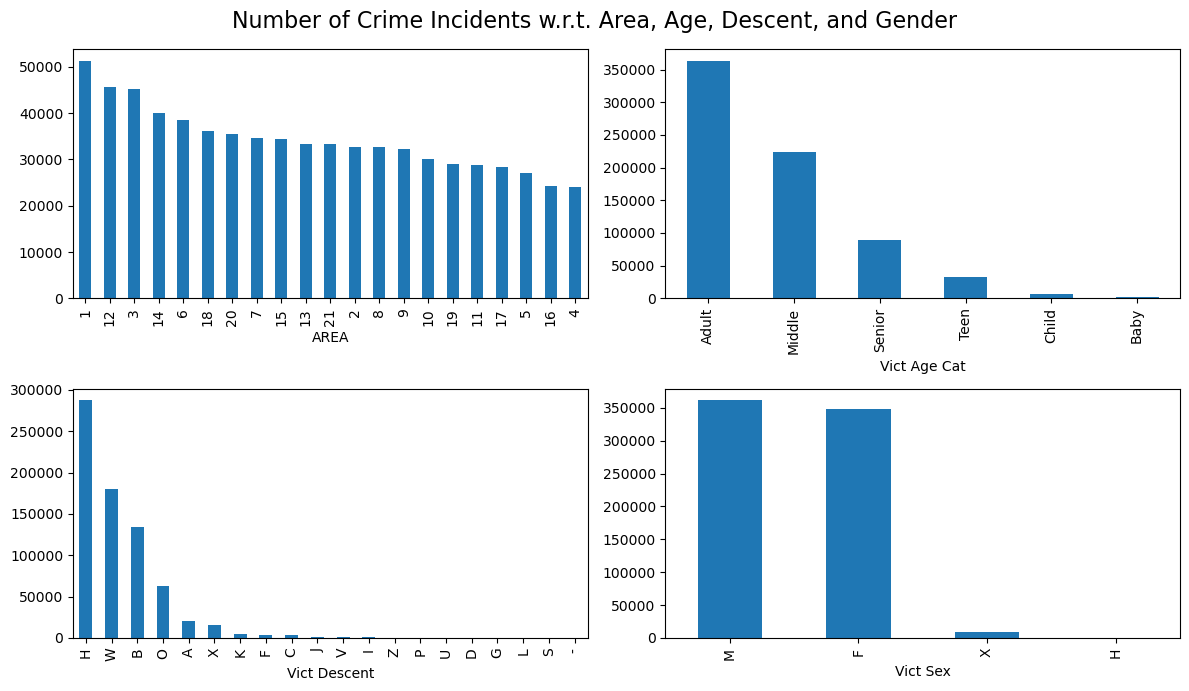

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,0])
df[df['Vict Descent'].notnull()].groupby(['Vict Age Cat'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,1])
df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,0])
df.groupby(['Vict Sex'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,1])
fig.suptitle('Number of Crime Incidents w.r.t. Area, Age, Descent, and Gender', fontsize=16)
plt.tight_layout()

הערה:

נראלי שכדאי להציג פה את הקורולציה בין העמודות עם מפת חום ולהראות שאין קשרים חזקים
ולכן החלטנו לנתח בצורות האחרות...

להראות גם המסה של הטבלה 

לנסות לעשות get dammis 
מה יצא לנו אחריי זה?

צריך לבדור בגיפיטי יש אופציה לעשות קורולציה עם גט דאממיז מול עמודה שבוחרים מהדאטה
אולי נצליח למצוא קורולציה מהנתונים ככה

אפשר גם לנסות למצוא קורולציה בין מס קוד של הפשע הכי נפוץ לגיל אולי או קבוצה אתנית 
סתם מעלה רעיון שאפשר להשתמש בקודים האלה


אפשר גם לנסות לבדוק לגביי הקוד פשע אם יש יותר מפשע אחד שהאדם הואשם בו אז אם יש קורולציה בין סוגי הפשעים לבין זה שיש יותר מפשע אחד
ואז לקחת בעצם רק את העמודה הזאת ולבדוק אותה 



ואז נתחיל לעסוק בחלקים עצמם של הניתוחים:

ניגש לניתוח הראשון לפי גילאים ונעמיק בו יותר 
איך אפשר להעמיק בו?
1- הגיל הנפוץ ביותר 
2- איזה פשעים נפוצים יותר לגילאים מסויימים 
3- באיזה חלק ביום נפגות קבוצות גיל מסויימות 
אפשר לחלק את הגילאים כמו שההוא שהעלה לקאגל חילק ואז נראה מגמה רחבה יותר




הניתוח השני שלנו יהיה על קבוצות אתניות 
אני רוצה שנעשה את הגרף נקודות שהן עשו ולפי זה נבחר להתעסק בקבוצות האתניות העיקריות
מה מעניין אותנו לבדוק על קבוצות אתניות? 
איזה קבוצה נפגעת הכי הרבה
פילוח הקורבנות לפי מוצא אתני וסוג הפשע.
באיזה אזור יש סכנה מרובה לקבוצה הזאת 
פשעים שמכוונים נגד קבוצות מסוימות (למשל פשעי שנאה).


בכל אחד מהניתוחים האלה אפשר להוסיף ניתוח לפי מיקום ולכן אני לא חושבת שיש צורךצלעשות גם ניתוח לפי מיקום בפני עצמו
או שאפשר גם עדיין לעשות ולוותר על ניתוח לפי זמן


ניתוח שלישי יהיה ניתוח לפי זמן \ שנים
להראות את העליה במספר הפשעים לאורך השנים
סוג הפשעים לפי עונות השנה? ,מעלה הצעה
כאילו בסגנון של רכוש נגנב יותר בקיץ
או לפי שעות - פשעים אלימים נפוצים בלילה?
ניתוח לפי שעות ביום 
סוגי פשיעה נפוצים לאורך השנים- למרות שכבר כנראה ניגע בזה לפני
צריך למצוא מה עוד יכול לעניין אותנו בקשר לניתוח לפי זמן 




ובסוף נצטרך לעשות סיכום של המסקנות שהגענו אליהם עד עכשיו 

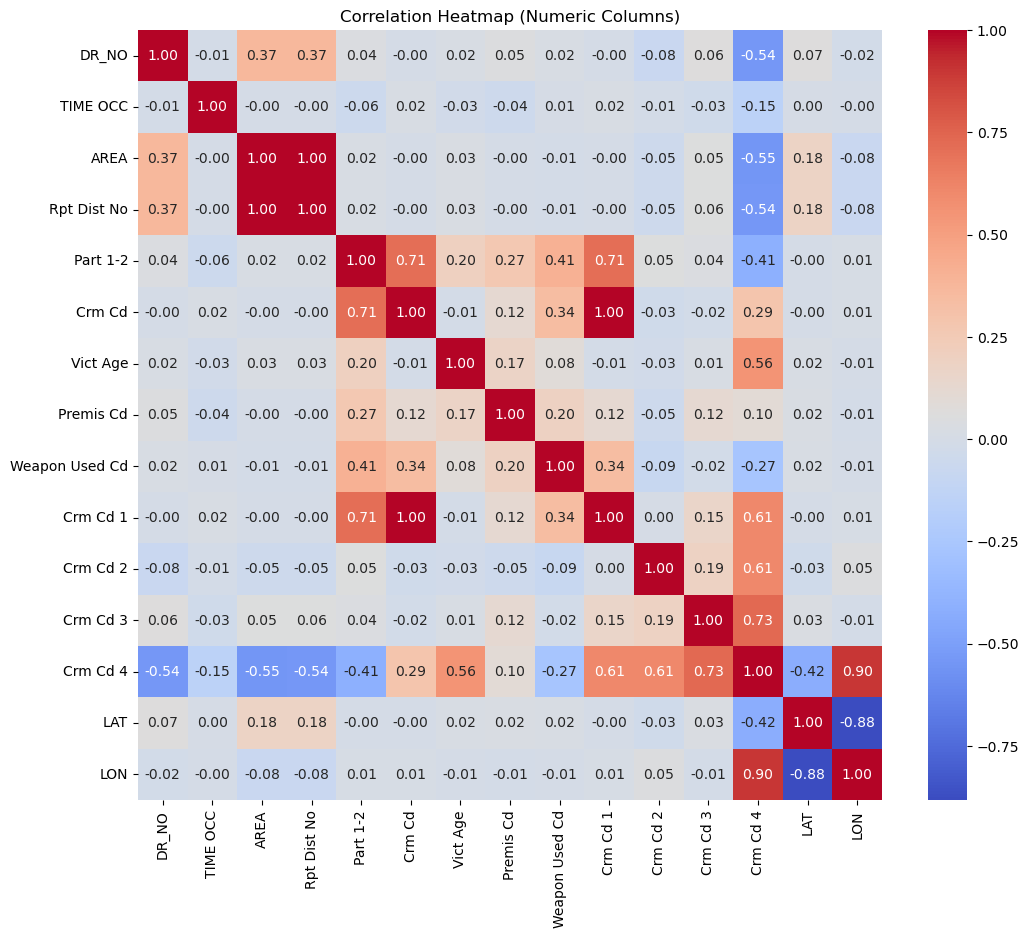

In [5]:

# Filter only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

<h2>
    מסקנה לגבי השימוש במפת החום

</h2>
<p>המפה מראה לנו כי אין קורולציות חזקות בין הנותונים ולכן בחרנו שלא להסתמך עליה ולחפש קשרים שונים לפי ההבנה שלנו של המידע הנתון </p>

### חלק ראשון - ניתוח לפי גילאים
נכתוב פה פסקה קצרה של הסבר של מה ניתחנו


איך אפשר להעמיק בו?
1- הגיל הנפוץ ביותר 
2- איזה פשעים נפוצים יותר לגילאים מסויימים 
3- באיזה חלק ביום נפגות קבוצות גיל מסויימות 
אפשר לחלק את הגילאים כמו שההוא שהעלה לקאגל חילק ואז נראה מגמה רחבה יותר



Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

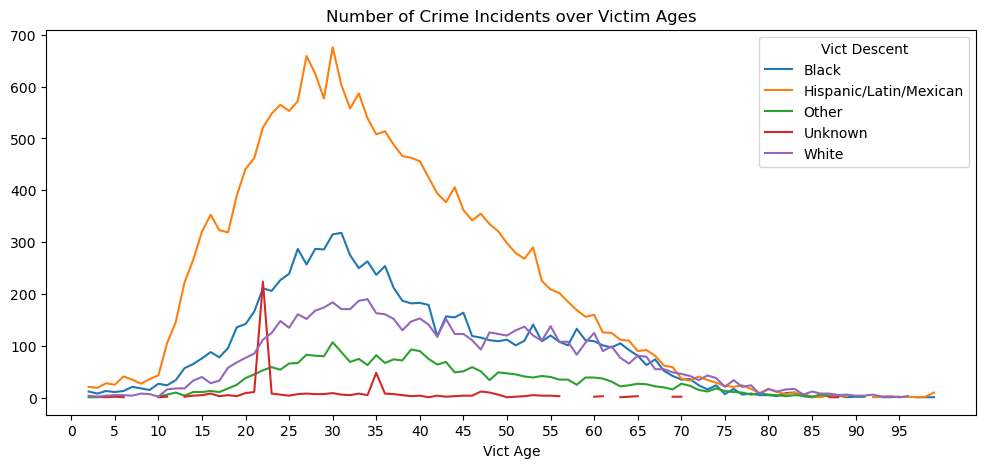

In [15]:
top5descents = df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[(df['Vict Age']>0) & (df['Vict Descent'].isin(top5descents))].copy()
vddict = {'B':'Black', 'H':'Hispanic/Latin/Mexican', 'O':'Other', 'W':'White', 'X':'Unknown'}
data['Vict Descent'] = data['Vict Descent'].apply(lambda x: vddict[x])

plt_data = data.groupby(['Vict Age', 'Vict Descent'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

As for the numbers of different genders over ages, two observations:

There is a separating line at age 35. Below this age, the number of crime incidents against female is higher than that of male.
There are two exceptional peaks for male: age 35 and 50.
There is a gender code 'H' (82 crime incidents), which is not mentioned in the official website.

לגבי המספרים של מגדרים שונים לפי גילאים, ניתן להסיק שתי תובנות:

יש קו מפריד בגיל 35. מתחת לגיל זה, מספר מקרי הפשיעה כנגד נשים גבוה יותר מזה של גברים.
יש שתי פסגות חריגות לגברים: בגיל 35 ובגיל 50.
קוד מגדר 'H' (82 מקרי פשיעה) אינו מוזכר באתר הרשמי.






הערה:

לא הבנתי מה זה נותן לנו?

ומהם שני הניתוחים הבאים?


נראלי שכדאי להיצמד לאופציות של הניתוחים שכתבתי למעלה


Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

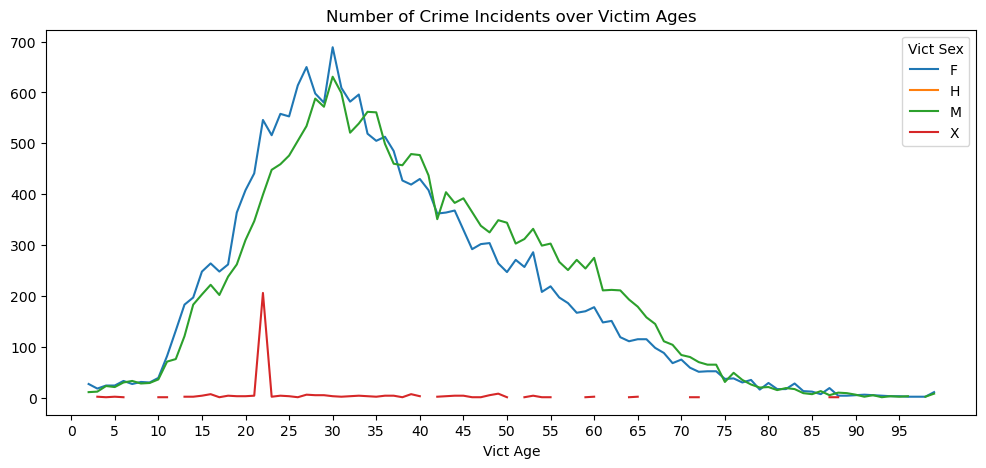

In [16]:
data = df[(df['Vict Age']>0)]
plt_data = data.groupby(['Vict Age', 'Vict Sex'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

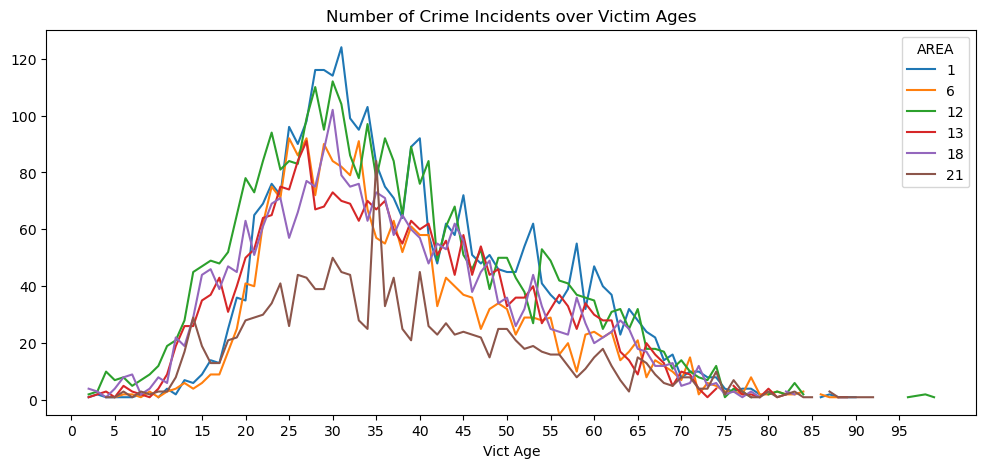

In [17]:
top5areas = list(df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5])
data = df[(df['Vict Age']>0) & (df['AREA'].isin(top5areas+[21]))]

plt_data = data.groupby(['Vict Age', 'AREA'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

<h1>ניתוח לפי שנים בצבעים</h1>

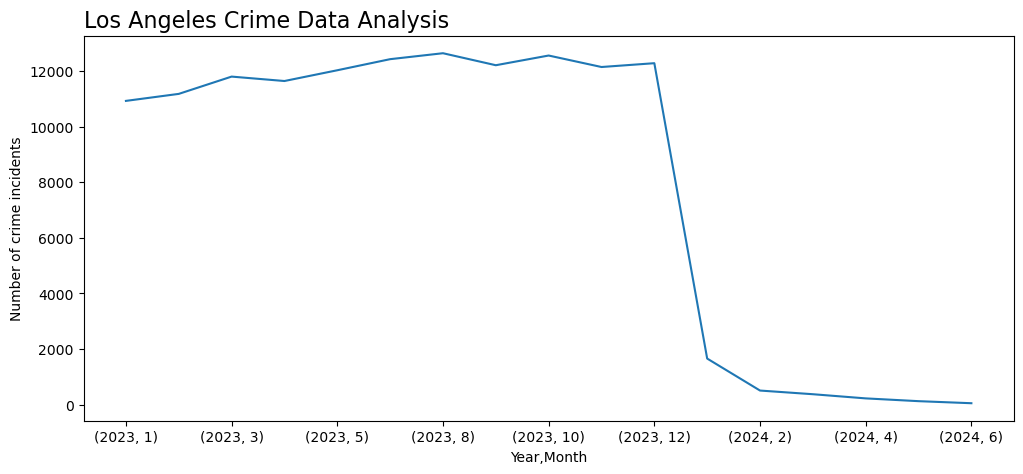

In [8]:
df.groupby(['Year', 'Month'])['Day'].count().plot(kind='line', figsize=(12, 5))
plt.ylabel('Number of crime incidents')
plt.title('Los Angeles Crime Data Analysis', loc='left', fontsize=16)
plt.show()

<h1>ניתוח לפי שנים בצבעים</h1>

<Axes: title={'center': 'Number of Crime Incidents over 12 Months'}, xlabel='Month'>

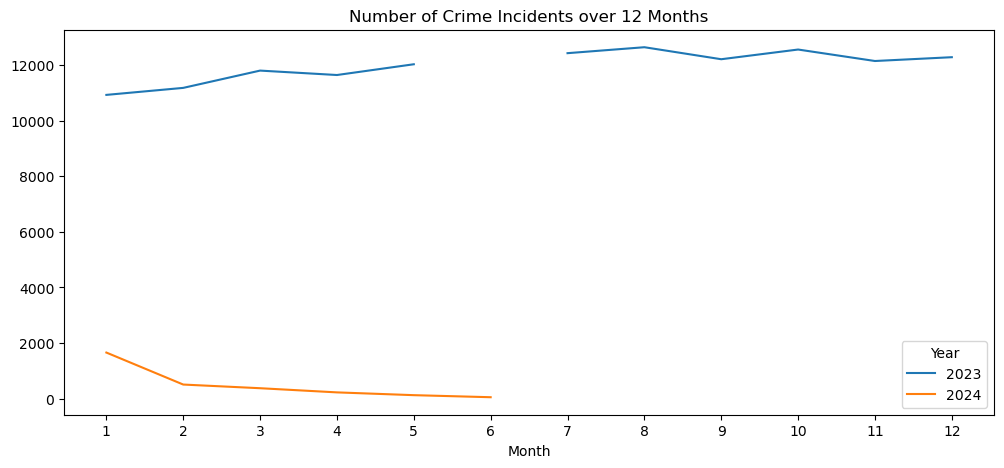

In [9]:
pltdata = df.groupby(['Month', 'Year'])['Day'].count().unstack()
pltdata.plot(kind='line', figsize=(12, 5), xticks=range(1, 13), title='Number of Crime Incidents over 12 Months')

In [14]:
df = df.dropna()
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Year,Month,Day,Hour,Vict Age Cat
2,231807171,03/04/2023,03/04/2023 12:00:00 AM,430,18,Southeast,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 0913 1814 0416 0419 0410,29,F,...,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,700 E 90TH ST,2023,3,4,4,Adult
15,231012898,08/25/2023,08/25/2023 12:00:00 AM,120,10,West Valley,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0913 1813 0400 0444 0319 2002 1414,50,F,...,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,17400 KESWICK ST,2023,8,25,1,Middle
26,230505815,02/18/2023,02/18/2023 12:00:00 AM,2112,5,Harbor,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0432 1309 1822,43,M,...,SIDEWALK,PIPE/METAL PIPE,IC,Invest Cont,200 N PACIFIC AV,2023,2,18,21,Middle
27,230814942,09/27/2023,09/27/2023 12:00:00 AM,30,8,West LA,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0913 0334 0445 1810,20,M,...,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,800 HILGARD AV,2023,9,27,0,Adult
30,232013484,07/30/2023,07/30/2023 12:00:00 AM,1855,20,Olympic,BATTERY - SIMPLE ASSAULT,0361 0444 0913,32,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,500 S KENMORE AV,2023,7,30,18,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79599,230913623,08/31/2023,08/31/2023 12:00:00 AM,1645,9,Van Nuys,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0445 1420 1414 2004 0421,38,F,...,GAS STATION,SCREWDRIVER,AA,Adult Arrest,SHERMAN WY,2023,8,31,16,Adult
79601,231209503,04/03/2023,04/02/2023 12:00:00 AM,2300,12,77th Street,ROBBERY,1822 0344 0334 0400 0416 0355 0342,52,M,...,SIDEWALK,FOLDING KNIFE,IC,Invest Cont,8300 S BROADWAY,2023,4,3,23,Middle
79604,230708271,04/10/2023,04/09/2023 12:00:00 AM,2327,7,Wilshire,BATTERY - SIMPLE ASSAULT,1822 0448 1300 1309 0400 0416,32,M,...,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1200 WEST BL,2023,4,10,23,Adult
79606,232106883,03/18/2023,03/18/2023 12:00:00 AM,100,21,Topanga,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 1813,49,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,21800 ROSCOE BL,2023,3,18,1,Middle


<h2>
    מיפוי של סוגי פשעים לפי זמנים
</h2>

<h2>
    מיפוי של סוגי פשעים לפי התיאור הנתון ולפי קבוצות אתניות
</h2>

In [8]:
df['Crm Cd Desc'].value_counts().sort_values()



Crm Cd Desc
INCITING A RIOT                                       1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
LYNCHING - ATTEMPTED                                  1
GRAND THEFT / AUTO REPAIR                             2
LYNCHING                                              2
                                                  ...  
INTIMATE PARTNER - SIMPLE ASSAULT                 46884
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    52142
BURGLARY FROM VEHICLE                             56801
THEFT OF IDENTITY                                 61410
BATTERY - SIMPLE ASSAULT                          74809
Name: count, Length: 136, dtype: int64

In [9]:
 
# Create a pivot table to show the count of crimes by ethnic group and crime description
crime_ethnic_pivot = df.pivot_table(index='Vict Descent',columns='Crm Cd Desc',aggfunc='size',fill_value=0)

    # Sort each row by the highest count and display
crime_ethnic_pivot = crime_ethnic_pivot.sort_values(by=crime_ethnic_pivot.columns.tolist(), ascending=False)

crime_ethnic_pivot

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Vict Descent,,,,,,,,,,,,,,,,,,,,,
H,583,93,26371,2488,37817,54,278,2043,3,5,...,105,16928,8631,1608,171,83,3264,6937,436,5
B,309,11,14166,647,14679,17,40,654,0,0,...,65,7567,3962,556,52,80,1017,1808,122,0
W,284,47,7397,588,13838,93,130,978,2,0,...,200,10728,4184,736,54,461,1428,1982,254,3
O,148,22,2660,323,5889,7,45,266,1,0,...,86,4096,1462,226,24,98,478,649,104,1
X,100,97,638,90,457,1,202,13,0,0,...,9,1480,527,33,9,21,33,48,2,4
A,47,8,814,112,1926,1,19,185,0,1,...,20,1233,436,68,7,51,134,194,35,0
U,11,0,1,0,5,0,0,0,0,0,...,0,10,0,0,0,2,0,0,0,0
K,3,0,47,10,132,0,0,5,0,0,...,1,486,130,5,0,12,7,16,2,0
C,2,0,0,0,14,0,0,2,0,0,...,0,309,103,2,0,5,2,0,0,0


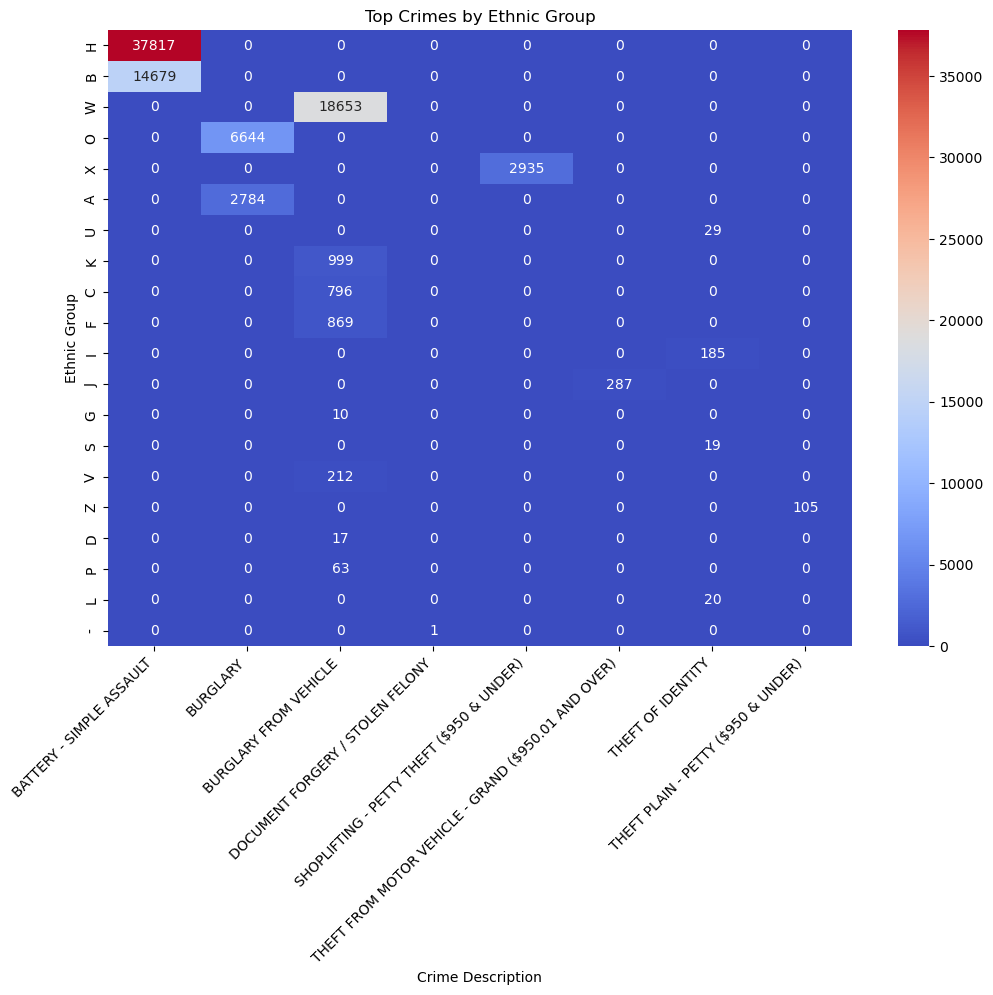

In [10]:
  
highlighted_data = crime_ethnic_pivot.apply(lambda row: row[row == row.max()], axis=1).fillna(0)

# Visualize the data: Show top crimes in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(highlighted_data, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title('Top Crimes by Ethnic Group')
plt.xlabel('Crime Description')
plt.ylabel('Ethnic Group')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
most_common_crime =df['Crm Cd Desc'].value_counts().idxmax()

# Filter data for the most common crime
filtered_data = df[df['Crm Cd Desc'] == most_common_crime]

# Analyze the relationship between crime code and victim's age and descent
age_ethnicity_analysis = filtered_data.groupby(['Vict Descent'])['Vict Age'].mean()

# Display the results
age_ethnicity_analysis.sort_values(ascending=False)

Vict Descent
K    52.174242
J    49.400000
V    47.750000
Z    47.500000
I    47.333333
W    45.412849
A    44.803219
O    43.428596
F    42.190476
B    41.184686
G    40.500000
C    39.500000
H    37.916783
X    37.288840
U    36.800000
P    32.000000
S    23.000000
Name: Vict Age, dtype: float64

In [13]:
df[
